# Data Science Assignment - Web3 Trading Team

**STEP 1: Setup and Data Loading**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
import os
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
print("📊 Starting Data Science Assignment - Market Sentiment vs Trading Behavior Analysis")
print("=" * 80)

📊 Starting Data Science Assignment - Market Sentiment vs Trading Behavior Analysis


**STEP 2: Load and Explore Datasets**

In [12]:
print("🔍 Loading datasets...")

try:
    trader_data = pd.read_csv('hyperliquid_data.csv')
    print(f"✅ Loaded trader data: {trader_data.shape[0]} rows, {trader_data.shape[1]} columns")
    sentiment_data = pd.read_csv('fear_greed_data.csv')
    print(f"✅ Loaded sentiment data: {sentiment_data.shape[0]} rows, {sentiment_data.shape[1]} columns")

except FileNotFoundError:
    print("❌ Files not found. Please ensure you've uploaded the CSV files.")
    exit()

🔍 Loading datasets...
✅ Loaded trader data: 211224 rows, 16 columns
✅ Loaded sentiment data: 2644 rows, 4 columns


**STEP 3: Data Exploration and Understanding**

In [13]:
print("\n🔍 DATASET EXPLORATION")
print("=" * 50)

print("📈 TRADER DATA OVERVIEW:")
print(trader_data.head())
print(f"\nColumns: {list(trader_data.columns)}")
print(f"Data types:\n{trader_data.dtypes}")
print(f"Missing values:\n{trader_data.isnull().sum()}")

print("\n📊 SENTIMENT DATA OVERVIEW:")
print(sentiment_data.head())
print(f"\nColumns: {list(sentiment_data.columns)}")
print(f"Data types:\n{sentiment_data.dtypes}")
print(f"Missing values:\n{sentiment_data.isnull().sum()}")


🔍 DATASET EXPLORATION
📈 TRADER DATA OVERVIEW:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transacti

**STEP 4: Data Cleaning and Preprocessing**

In [14]:
print("\n🧹 DATA CLEANING AND PREPROCESSING")
print("=" * 50)
print("Cleaning trader data...")
trader_data_clean = trader_data.copy()
if 'Timestamp IST' in trader_data_clean.columns:
    try:
        trader_data_clean['Timestamp IST'] = pd.to_datetime(trader_data_clean['Timestamp IST'], format='mixed', dayfirst=True)
    except:
        try:
            trader_data_clean['Timestamp IST'] = pd.to_datetime(trader_data_clean['Timestamp IST'], format='%d-%m-%Y %H:%M')
        except:
            try:
                trader_data_clean['Timestamp IST'] = pd.to_datetime(trader_data_clean['Timestamp IST'], dayfirst=True)
            except:
                trader_data_clean['Timestamp IST'] = pd.to_datetime(trader_data_clean['Timestamp IST'], errors='coerce')

    trader_data_clean['date'] = trader_data_clean['Timestamp IST'].dt.strftime('%Y-%m-%d')

elif 'Timestamp' in trader_data_clean.columns:
    try:
        trader_data_clean['Timestamp'] = pd.to_datetime(trader_data_clean['Timestamp'], format='mixed', dayfirst=True)
    except:
        try:
            trader_data_clean['Timestamp'] = pd.to_datetime(trader_data_clean['Timestamp'], format='%d-%m-%Y %H:%M')
        except:
            try:
                trader_data_clean['Timestamp'] = pd.to_datetime(trader_data_clean['Timestamp'], dayfirst=True)
            except:
                trader_data_clean['Timestamp'] = pd.to_datetime(trader_data_clean['Timestamp'], errors='coerce')

    trader_data_clean['date'] = trader_data_clean['Timestamp'].dt.strftime('%Y-%m-%d')

print("Cleaning sentiment data...")
sentiment_data_clean = sentiment_data.copy()

if 'date' in sentiment_data_clean.columns:

    try:
        sentiment_data_clean['date'] = pd.to_datetime(sentiment_data_clean['date']).dt.strftime('%Y-%m-%d')
    except:
        try:
            sentiment_data_clean['date'] = pd.to_datetime(sentiment_data_clean['date'], dayfirst=True).dt.strftime('%Y-%m-%d')
        except:
            sentiment_data_clean['date'] = pd.to_datetime(sentiment_data_clean['date'], errors='coerce').dt.strftime('%Y-%m-%d')

if 'Closed PnL' in trader_data_clean.columns:
    trader_data_clean = trader_data_clean.dropna(subset=['Closed PnL'])

sentiment_data_clean = sentiment_data_clean.dropna()
if 'Timestamp IST' in trader_data_clean.columns:
    trader_data_clean = trader_data_clean.dropna(subset=['Timestamp IST'])
elif 'Timestamp' in trader_data_clean.columns:
    trader_data_clean = trader_data_clean.dropna(subset=['Timestamp'])

sentiment_data_clean = sentiment_data_clean.dropna(subset=['date'])

print(f"✅ Cleaned trader data: {trader_data_clean.shape[0]} rows")
print(f"✅ Cleaned sentiment data: {sentiment_data_clean.shape[0]} rows")

print("\n📋 Sample of cleaned trader data:")
timestamp_col = 'Timestamp IST' if 'Timestamp IST' in trader_data_clean.columns else 'Timestamp'
print(trader_data_clean[[timestamp_col, 'date']].head())

print("\n📋 Sample of cleaned sentiment data:")
print(sentiment_data_clean[['date']].head())



🧹 DATA CLEANING AND PREPROCESSING
Cleaning trader data...
Cleaning sentiment data...
✅ Cleaned trader data: 211224 rows
✅ Cleaned sentiment data: 2644 rows

📋 Sample of cleaned trader data:
        Timestamp IST        date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02

📋 Sample of cleaned sentiment data:
         date
0  2018-02-01
1  2018-02-02
2  2018-02-03
3  2018-02-04
4  2018-02-05


**STEP 5: Feature Engineering**

In [15]:
print("\n⚙️ FEATURE ENGINEERING")
print("=" * 50)
if 'Size USD' in trader_data_clean.columns and 'Size Tokens' in trader_data_clean.columns:
    trader_data_clean['avg_price'] = trader_data_clean['Size USD'] / trader_data_clean['Size Tokens']
if 'Size USD' in trader_data_clean.columns:
    trader_data_clean['position_size_category'] = pd.cut(
        trader_data_clean['Size USD'],
        bins=[0, 1000, 5000, 10000, float('inf')],
        labels=['Small', 'Medium', 'Large', 'Very Large']
    )
if 'Closed PnL' in trader_data_clean.columns:
    trader_data_clean['is_profitable'] = trader_data_clean['Closed PnL'] > 0

if 'value' in sentiment_data_clean.columns:
    sentiment_data_clean['sentiment_category'] = pd.cut(
        sentiment_data_clean['value'],
        bins=[0, 25, 50, 75, 100],
        labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed']
    )

print("✅ Feature engineering completed")


⚙️ FEATURE ENGINEERING
✅ Feature engineering completed


**STEP 6: Merge Datasets**

In [16]:
print("\n🔗 MERGING DATASETS")
print("=" * 50)
merged_data = pd.merge(trader_data_clean, sentiment_data_clean, on='date', how='inner')
print(f"✅ Initial merge result: {merged_data.shape[0]} rows, {merged_data.shape[1]} columns")
if merged_data.empty:
    print("⚠️ No direct date matches found. Trying alternative merge strategies...")
    trader_dates = set(trader_data_clean['date'].unique())
    sentiment_dates = set(sentiment_data_clean['date'].unique())
    print(f"Trader data date range: {min(trader_dates)} to {max(trader_dates)}")
    print(f"Sentiment data date range: {min(sentiment_dates)} to {max(sentiment_dates)}")
    def find_closest_date(target_date, available_dates):
        target = pd.to_datetime(target_date)
        available = [pd.to_datetime(d) for d in available_dates]
        closest = min(available, key=lambda x: abs((target - x).days))
        return closest.strftime('%Y-%m-%d')
    trader_data_clean['sentiment_date'] = trader_data_clean['date'].apply(
        lambda x: find_closest_date(x, sentiment_dates)
    )
    merged_data = pd.merge(
        trader_data_clean,
        sentiment_data_clean,
        left_on='sentiment_date',
        right_on='date',
        how='inner',
        suffixes=('_trader', '_sentiment')
    )

    print(f"✅ Alternative merge successful: {merged_data.shape[0]} rows")
if merged_data.empty:
    print("⚠️ Still no matches. Using cross-join with date filtering...")
    trader_data_clean['key'] = 1
    sentiment_data_clean['key'] = 1
    cross_joined = pd.merge(trader_data_clean, sentiment_data_clean, on='key', suffixes=('_trader', '_sentiment'))
    cross_joined = cross_joined.drop('key', axis=1)
    cross_joined['date_diff'] = abs(
        pd.to_datetime(cross_joined['date_trader']) - pd.to_datetime(cross_joined['date_sentiment'])
    ).dt.days
    merged_data = cross_joined[cross_joined['date_diff'] <= 7].copy()
    merged_data = merged_data.loc[merged_data.groupby(['Account', 'Trade ID'])['date_diff'].idxmin()]
    print(f"✅ Cross-join merge successful: {merged_data.shape[0]} rows")
merged_data.to_csv('csv_files/merged_trading_sentiment_data.csv', index=False)
print("💾 Saved merged data to csv_files/merged_trading_sentiment_data.csv")



🔗 MERGING DATASETS
✅ Initial merge result: 211218 rows, 24 columns
💾 Saved merged data to csv_files/merged_trading_sentiment_data.csv


**STEP 7: Exploratory Data Analysis**


📊 EXPLORATORY DATA ANALYSIS


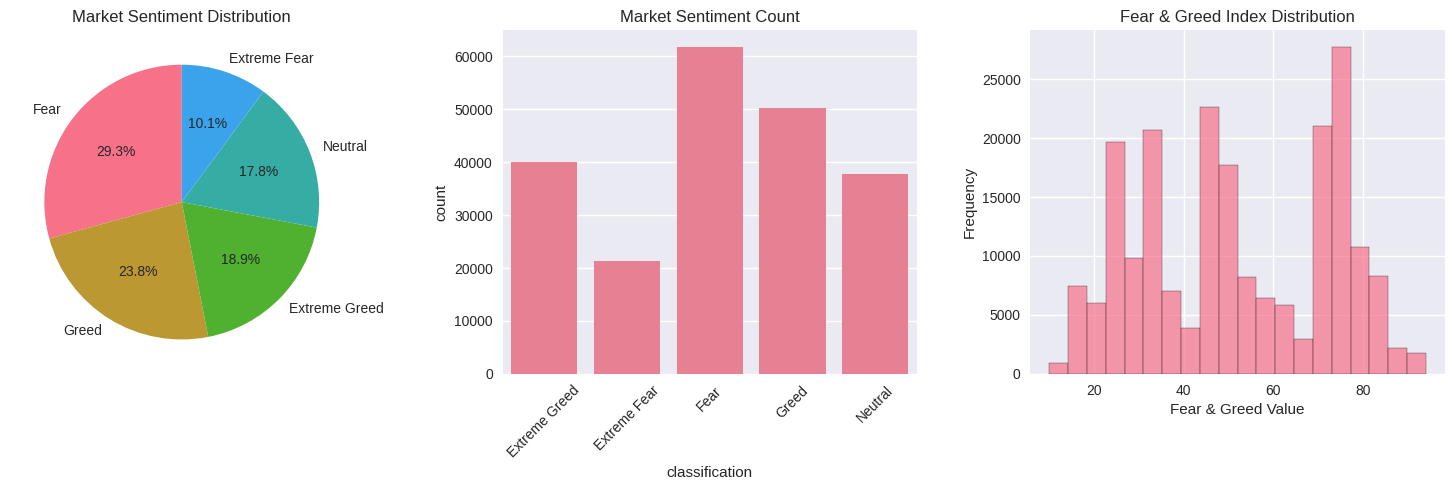

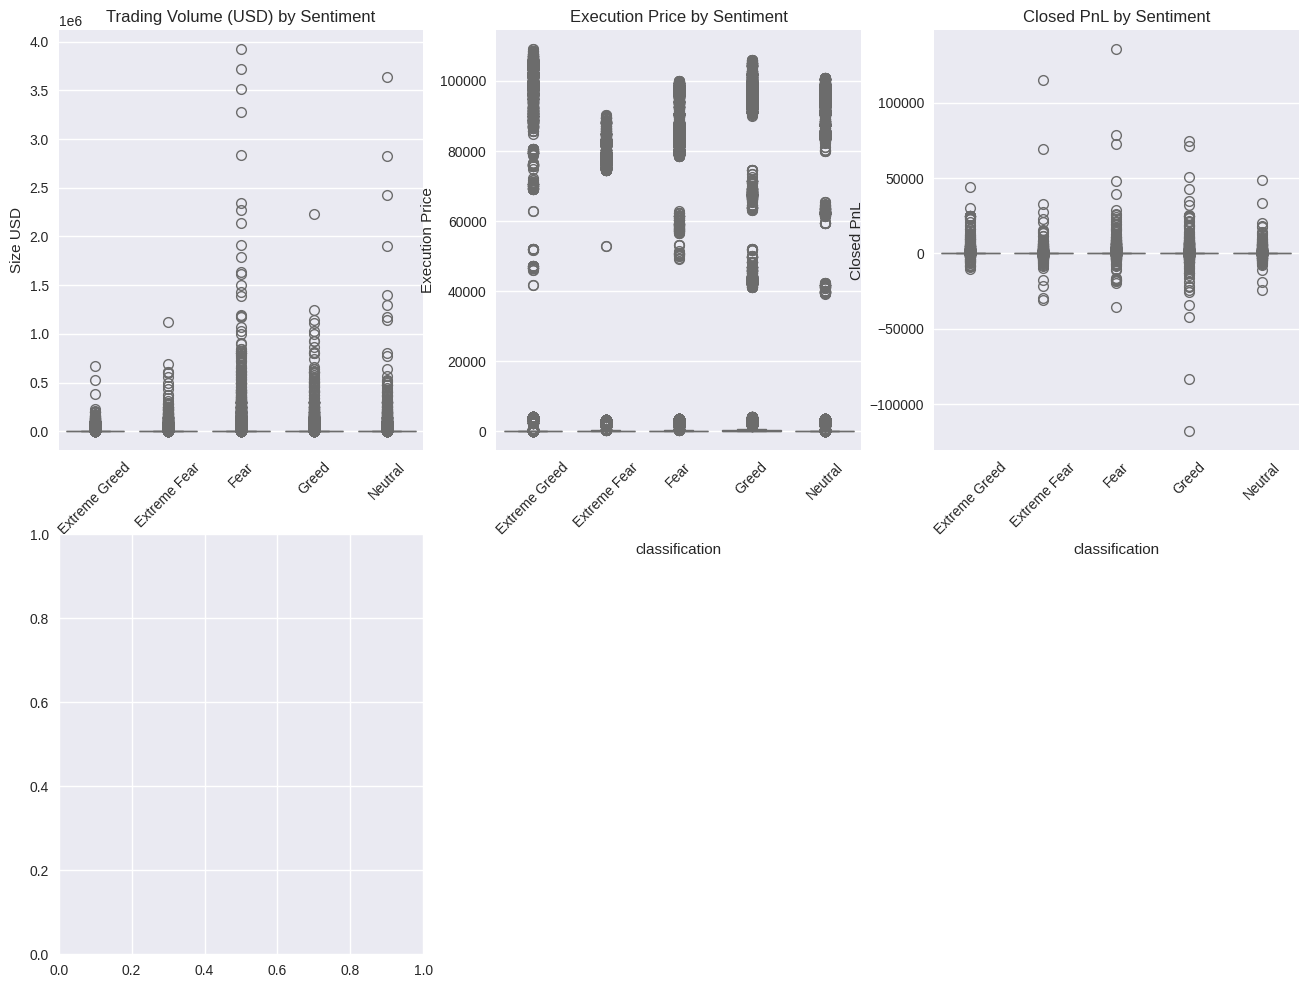

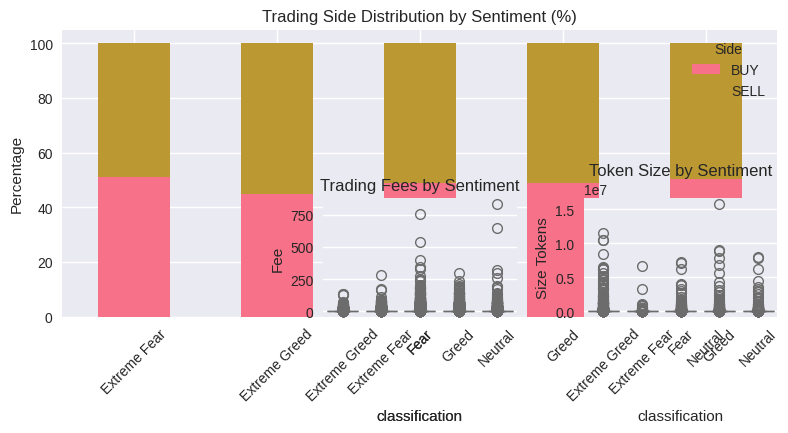

In [17]:
print("\n📊 EXPLORATORY DATA ANALYSIS")
print("=" * 50)
classification_col = 'classification' if 'classification' in merged_data.columns else 'sentiment_category'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sentiment_counts = merged_data[classification_col].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Sentiment Distribution')
plt.subplot(1, 3, 2)
sns.countplot(data=merged_data, x=classification_col)
plt.title('Market Sentiment Count')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
if 'value' in merged_data.columns:
    plt.hist(merged_data['value'], bins=20, alpha=0.7, edgecolor='black')
    plt.title('Fear & Greed Index Distribution')
    plt.xlabel('Fear & Greed Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('outputs/sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
if 'Size USD' in merged_data.columns:
    sns.boxplot(data=merged_data, x=classification_col, y='Size USD')
    plt.title('Trading Volume (USD) by Sentiment')
    plt.xticks(rotation=45)
plt.subplot(2, 3, 2)
if 'Execution Price' in merged_data.columns:
    sns.boxplot(data=merged_data, x=classification_col, y='Execution Price')
    plt.title('Execution Price by Sentiment')
    plt.xticks(rotation=45)
plt.subplot(2, 3, 3)
if 'Closed PnL' in merged_data.columns:
    sns.boxplot(data=merged_data, x=classification_col, y='Closed PnL')
    plt.title('Closed PnL by Sentiment')
    plt.xticks(rotation=45)
plt.subplot(2, 3, 4)
if 'Side' in merged_data.columns:
    side_sentiment = pd.crosstab(merged_data[classification_col], merged_data['Side'], normalize='index') * 100
    side_sentiment.plot(kind='bar', stacked=True)
    plt.title('Trading Side Distribution by Sentiment (%)')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
plt.subplot(2, 3, 5)
if 'Fee' in merged_data.columns:
    sns.boxplot(data=merged_data, x=classification_col, y='Fee')
    plt.title('Trading Fees by Sentiment')
    plt.xticks(rotation=45)
plt.subplot(2, 3, 6)
if 'Size Tokens' in merged_data.columns:
    sns.boxplot(data=merged_data, x=classification_col, y='Size Tokens')
    plt.title('Token Size by Sentiment')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('outputs/trading_metrics_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

**STEP 8: Statistical Analysis**

In [18]:
print("\n📈 STATISTICAL ANALYSIS")
print("=" * 50)
if 'Closed PnL' in merged_data.columns:
    profitability_by_sentiment = merged_data.groupby(classification_col)['Closed PnL'].agg([
        'mean', 'median', 'std', 'count', 'min', 'max'
    ]).round(2)
    print("💰 PROFITABILITY BY SENTIMENT:")
    print(profitability_by_sentiment)
    profitability_by_sentiment.to_csv('csv_files/profitability_analysis.csv')
if 'Size USD' in merged_data.columns:
    volume_by_sentiment = merged_data.groupby(classification_col)['Size USD'].agg([
        'mean', 'median', 'std', 'count', 'min', 'max'
    ]).round(2)
    print("\n📊 TRADING VOLUME (USD) BY SENTIMENT:")
    print(volume_by_sentiment)
    volume_by_sentiment.to_csv('csv_files/volume_analysis.csv')
if 'Execution Price' in merged_data.columns:
    price_by_sentiment = merged_data.groupby(classification_col)['Execution Price'].agg([
        'mean', 'median', 'std', 'count', 'min', 'max'
    ]).round(4)
    print("\n💱 EXECUTION PRICE BY SENTIMENT:")
    print(price_by_sentiment)
    price_by_sentiment.to_csv('csv_files/price_analysis.csv')
if 'Side' in merged_data.columns:
    side_sentiment_analysis = pd.crosstab(merged_data[classification_col], merged_data['Side'], normalize='index') * 100
    print("\n🔄 TRADING SIDE DISTRIBUTION BY SENTIMENT (%):")
    print(side_sentiment_analysis.round(2))
    side_sentiment_analysis.to_csv('csv_files/side_analysis.csv')
if 'Closed PnL' in merged_data.columns:
    profitable_trades = merged_data.groupby(classification_col)['is_profitable'].agg(['mean', 'count']).round(3)
    profitable_trades.columns = ['Profitability_Rate', 'Total_Trades']
    print("\n📈 PROFITABILITY RATE BY SENTIMENT:")
    print(profitable_trades)
    profitable_trades.to_csv('csv_files/profitability_rate.csv')



📈 STATISTICAL ANALYSIS
💰 PROFITABILITY BY SENTIMENT:
                 mean  median      std  count        min        max
classification                                                     
Extreme Fear    34.54     0.0  1136.06  21400  -31036.69  115287.00
Extreme Greed   67.89     0.0   766.83  39992  -10259.47   44223.45
Fear            54.29     0.0   935.36  61837  -35681.75  135329.09
Greed           42.74     0.0  1116.03  50303 -117990.10   74530.52
Neutral         34.31     0.0   517.12  37686  -24500.00   48504.10

📊 TRADING VOLUME (USD) BY SENTIMENT:
                   mean  median       std  count   min         max
classification                                                    
Extreme Fear    5349.73  766.15  22306.83  21400  0.01  1120971.60
Extreme Greed   3112.25  500.05  11062.00  39992  0.00   665771.71
Fear            7816.11  735.96  51914.86  61837  0.00  3921430.72
Greed           5736.88  555.00  30533.42  50303  0.00  2227114.71
Neutral         4782.73  547.6

**STEP 9: Advanced Correlation Analysis**


🔗 CORRELATION ANALYSIS
📊 CORRELATION MATRIX:
                   sentiment_numeric  value  Closed PnL  Size USD  \
sentiment_numeric              1.000  0.967       0.006    -0.032   
value                          0.967  1.000       0.008    -0.030   
Closed PnL                     0.006  0.008       1.000     0.124   
Size USD                      -0.032 -0.030       0.124     1.000   
Execution Price               -0.038 -0.028      -0.006     0.190   
Fee                           -0.029 -0.027       0.084     0.746   
Size Tokens                    0.020  0.023       0.005     0.013   

                   Execution Price    Fee  Size Tokens  
sentiment_numeric           -0.038 -0.029        0.020  
value                       -0.028 -0.027        0.023  
Closed PnL                  -0.006  0.084        0.005  
Size USD                     0.190  0.746        0.013  
Execution Price              1.000  0.225       -0.017  
Fee                          0.225  1.000        0.007  
Si

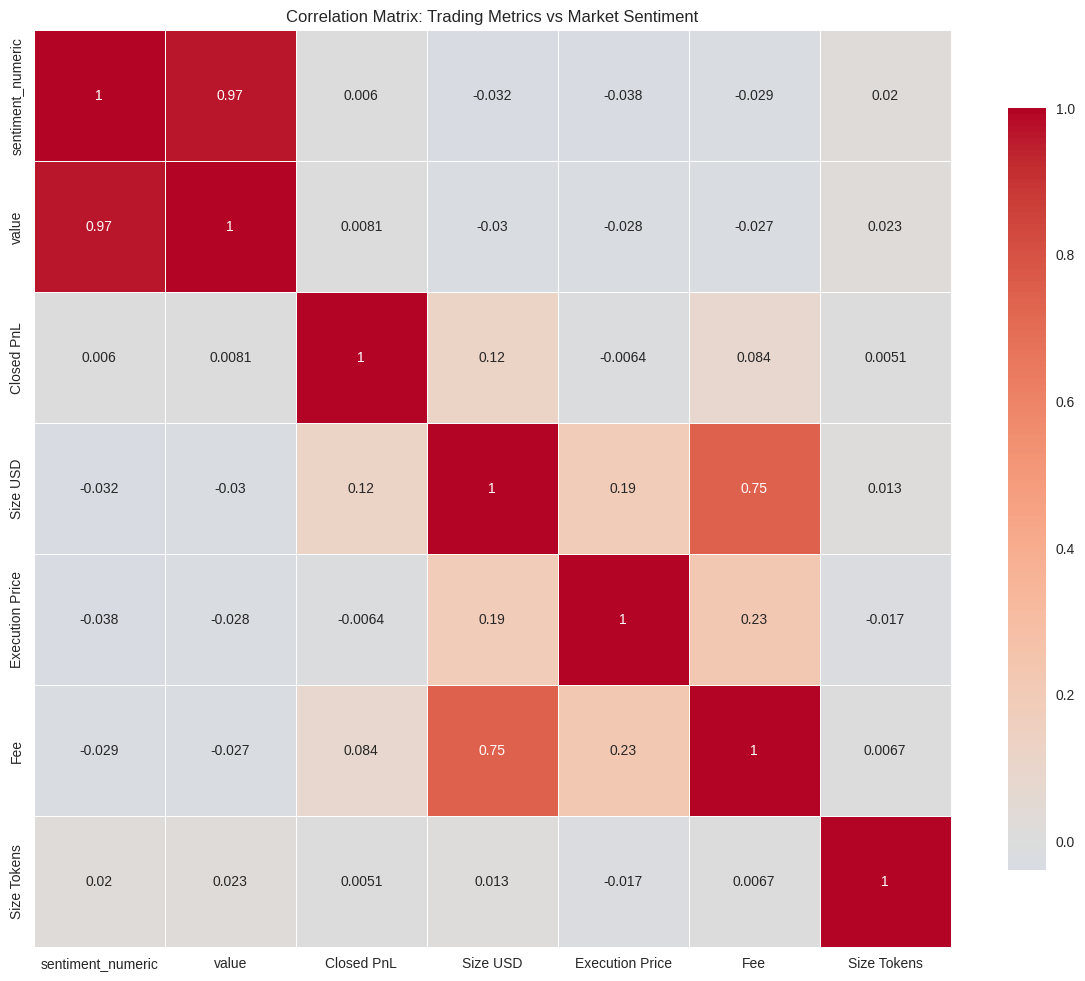

In [19]:
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 50)
sentiment_mapping = {
    'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4
}
merged_data['sentiment_numeric'] = merged_data[classification_col].map(sentiment_mapping)
numerical_cols = ['sentiment_numeric']
if 'value' in merged_data.columns:
    numerical_cols.append('value')
if 'Closed PnL' in merged_data.columns:
    numerical_cols.append('Closed PnL')
if 'Size USD' in merged_data.columns:
    numerical_cols.append('Size USD')
if 'Execution Price' in merged_data.columns:
    numerical_cols.append('Execution Price')
if 'Fee' in merged_data.columns:
    numerical_cols.append('Fee')
if 'Size Tokens' in merged_data.columns:
    numerical_cols.append('Size Tokens')
correlation_matrix = merged_data[numerical_cols].corr()
print("📊 CORRELATION MATRIX:")
print(correlation_matrix.round(3))
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Trading Metrics vs Market Sentiment')
plt.tight_layout()
plt.savefig('outputs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**STEP 10: Time Series Analysis**


📅 TIME SERIES ANALYSIS


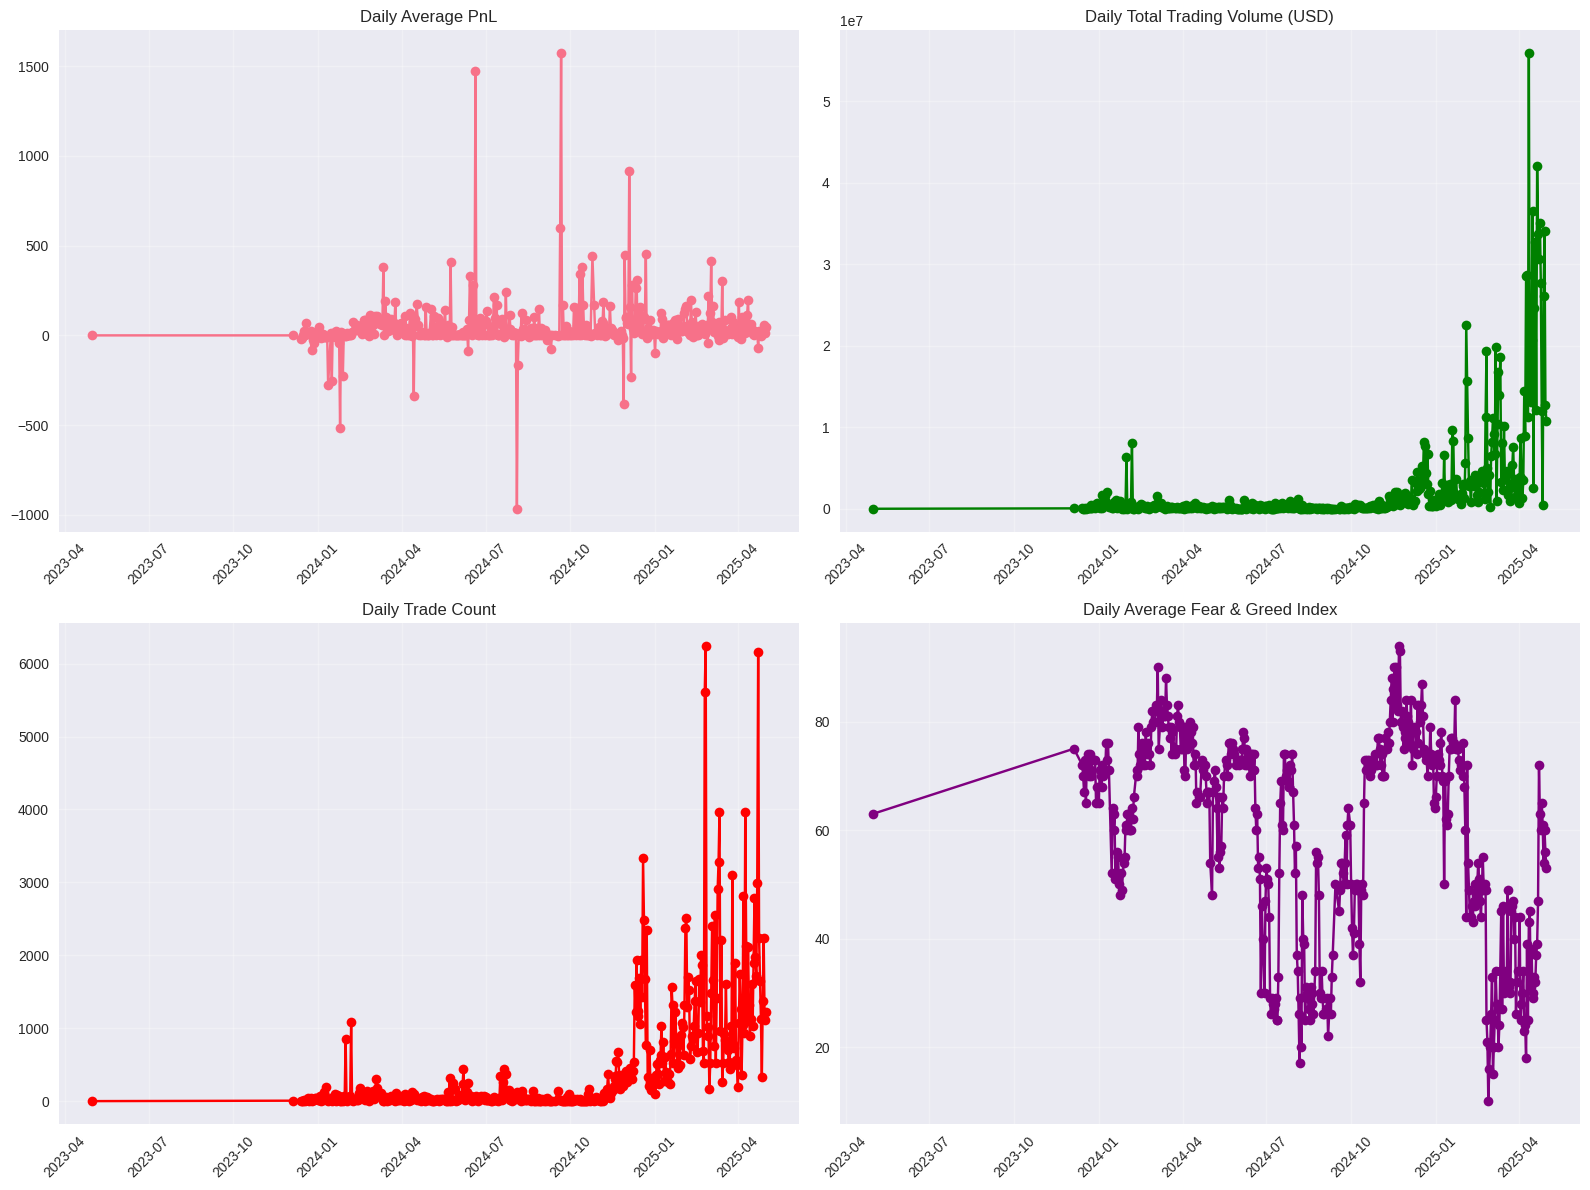

In [20]:
print("\n📅 TIME SERIES ANALYSIS")
print("=" * 50)
date_col = 'date' if 'date' in merged_data.columns else 'date_trader'
merged_data['date_dt'] = pd.to_datetime(merged_data[date_col])
daily_metrics = merged_data.groupby('date_dt').agg({
    'Closed PnL': ['mean', 'sum', 'count'] if 'Closed PnL' in merged_data.columns else ['count'],
    'Size USD': ['mean', 'sum'] if 'Size USD' in merged_data.columns else ['count'],
    'sentiment_numeric': 'mean',
    'value': 'mean' if 'value' in merged_data.columns else 'count'
}).reset_index()
daily_metrics.columns = ['_'.join(col).strip() if col[1] else col[0] for col in daily_metrics.columns]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
if 'Closed PnL_mean' in daily_metrics.columns:
    axes[0, 0].plot(daily_metrics['date_dt'], daily_metrics['Closed PnL_mean'], marker='o')
    axes[0, 0].set_title('Daily Average PnL')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
if 'Size USD_sum' in daily_metrics.columns:
    axes[0, 1].plot(daily_metrics['date_dt'], daily_metrics['Size USD_sum'], marker='o', color='green')
    axes[0, 1].set_title('Daily Total Trading Volume (USD)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
if 'Closed PnL_count' in daily_metrics.columns:
    axes[1, 0].plot(daily_metrics['date_dt'], daily_metrics['Closed PnL_count'], marker='o', color='red')
    axes[1, 0].set_title('Daily Trade Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
if 'value_mean' in daily_metrics.columns:
    axes[1, 1].plot(daily_metrics['date_dt'], daily_metrics['value_mean'], marker='o', color='purple')
    axes[1, 1].set_title('Daily Average Fear & Greed Index')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/time_series_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**STEP 11: Advanced Insights Generation**

In [21]:
print("\n💡 ADVANCED INSIGHTS AND CONCLUSIONS")
print("=" * 50)

insights = []

if 'Closed PnL' in merged_data.columns:
    sentiment_profits = merged_data.groupby(classification_col)['Closed PnL'].mean()
    best_sentiment = sentiment_profits.idxmax()
    worst_sentiment = sentiment_profits.idxmin()

    insights.append(f"🎯 PROFITABILITY: Traders are most profitable during '{best_sentiment}' periods (avg: ${sentiment_profits[best_sentiment]:.2f}) and least profitable during '{worst_sentiment}' periods (avg: ${sentiment_profits[worst_sentiment]:.2f})")

if 'Size USD' in merged_data.columns:
    sentiment_volumes = merged_data.groupby(classification_col)['Size USD'].mean()
    highest_volume_sentiment = sentiment_volumes.idxmax()
    lowest_volume_sentiment = sentiment_volumes.idxmin()

    insights.append(f"📊 VOLUME: Highest trading volumes occur during '{highest_volume_sentiment}' periods (avg: ${sentiment_volumes[highest_volume_sentiment]:.2f}) vs lowest during '{lowest_volume_sentiment}' periods (avg: ${sentiment_volumes[lowest_volume_sentiment]:.2f})")

if 'Side' in merged_data.columns:
    buy_ratio_by_sentiment = merged_data.groupby(classification_col)['Side'].apply(lambda x: (x == 'BUY').mean() * 100)
    highest_buy_sentiment = buy_ratio_by_sentiment.idxmax()
    lowest_buy_sentiment = buy_ratio_by_sentiment.idxmin()

    insights.append(f"🔄 TRADING BEHAVIOR: Highest buy ratio during '{highest_buy_sentiment}' ({buy_ratio_by_sentiment[highest_buy_sentiment]:.1f}% buys) vs lowest during '{lowest_buy_sentiment}' ({buy_ratio_by_sentiment[lowest_buy_sentiment]:.1f}% buys)")

if 'Execution Price' in merged_data.columns:
    price_variation = merged_data.groupby(classification_col)['Execution Price'].std()
    highest_volatility_sentiment = price_variation.idxmax()

    insights.append(f"💱 PRICE VOLATILITY: Highest price volatility during '{highest_volatility_sentiment}' periods (std: {price_variation[highest_volatility_sentiment]:.4f})")

if 'Closed PnL' in merged_data.columns:
    risk_metrics = merged_data.groupby(classification_col)['Closed PnL'].agg(['std', 'min', 'max'])
    riskiest_sentiment = risk_metrics['std'].idxmax()

    insights.append(f"⚠️ RISK: Highest risk (PnL volatility) during '{riskiest_sentiment}' periods (std: ${risk_metrics.loc[riskiest_sentiment, 'std']:.2f})")

if 'value' in merged_data.columns and 'Closed PnL' in merged_data.columns:
    correlation = merged_data['value'].corr(merged_data['Closed PnL'])
    if abs(correlation) > 0.1:
        direction = "positive" if correlation > 0 else "negative"
        insights.append(f"🔗 CORRELATION: {direction.capitalize()} correlation ({correlation:.3f}) between Fear & Greed Index and trading profits")

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")



💡 ADVANCED INSIGHTS AND CONCLUSIONS
1. 🎯 PROFITABILITY: Traders are most profitable during 'Extreme Greed' periods (avg: $67.89) and least profitable during 'Neutral' periods (avg: $34.31)
2. 📊 VOLUME: Highest trading volumes occur during 'Fear' periods (avg: $7816.11) vs lowest during 'Extreme Greed' periods (avg: $3112.25)
3. 🔄 TRADING BEHAVIOR: Highest buy ratio during 'Extreme Fear' (51.1% buys) vs lowest during 'Extreme Greed' (44.9% buys)
4. 💱 PRICE VOLATILITY: Highest price volatility during 'Fear' periods (std: 31644.4329)
5. ⚠️ RISK: Highest risk (PnL volatility) during 'Extreme Fear' periods (std: $1136.06)


**STEP 12: Summary Statistics and Export**

In [22]:
print("\n📋 GENERATING SUMMARY REPORT")
print("=" * 50)

summary_stats = {}

summary_stats['Total Trades'] = len(merged_data)
summary_stats['Date Range'] = f"{merged_data['date_dt'].min().strftime('%Y-%m-%d')} to {merged_data['date_dt'].max().strftime('%Y-%m-%d')}"
summary_stats['Unique Trading Days'] = merged_data['date_dt'].nunique()

if 'Closed PnL' in merged_data.columns:
    summary_stats['Total PnL'] = merged_data['Closed PnL'].sum()
    summary_stats['Average PnL per Trade'] = merged_data['Closed PnL'].mean()
    summary_stats['Profitable Trades %'] = (merged_data['Closed PnL'] > 0).mean() * 100

if 'Size USD' in merged_data.columns:
    summary_stats['Total Volume (USD)'] = merged_data['Size USD'].sum()
    summary_stats['Average Trade Size (USD)'] = merged_data['Size USD'].mean()

sentiment_distribution = merged_data[classification_col].value_counts(normalize=True) * 100
for sentiment, percentage in sentiment_distribution.items():
    summary_stats[f'{sentiment} Trading Days %'] = percentage

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_df.to_csv('csv_files/summary_statistics.csv', index=False)

print("📊 SUMMARY STATISTICS:")
for metric, value in summary_stats.items():
    if isinstance(value, float):
        print(f"   {metric}: {value:.2f}")
    else:
        print(f"   {metric}: {value}")

with open('csv_files/key_insights.txt', 'w') as f:
    f.write("KEY INSIGHTS FROM TRADING BEHAVIOR vs MARKET SENTIMENT ANALYSIS\n")
    f.write("=" * 70 + "\n\n")
    f.write("SUMMARY STATISTICS:\n")
    f.write("-" * 20 + "\n")
    for metric, value in summary_stats.items():
        f.write(f"{metric}: {value}\n")
    f.write("\n" + "=" * 70 + "\n")
    f.write("DETAILED INSIGHTS:\n")
    f.write("-" * 20 + "\n")
    for i, insight in enumerate(insights, 1):
        f.write(f"{i}. {insight}\n")

print("\n✅ ANALYSIS COMPLETE!")
print("📁 Files generated:")
print("   - csv_files/merged_trading_sentiment_data.csv")
print("   - csv_files/profitability_analysis.csv")
print("   - csv_files/volume_analysis.csv")
print("   - csv_files/price_analysis.csv")
print("   - csv_files/side_analysis.csv")
print("   - csv_files/profitability_rate.csv")
print("   - csv_files/summary_statistics.csv")
print("   - csv_files/key_insights.txt")
print("   - outputs/sentiment_distribution.png")
print("   - outputs/trading_metrics_by_sentiment.png")
print("   - outputs/correlation_heatmap.png")
print("   - outputs/time_series_analysis.png")

print("\n🎉 Ready for submission! Use the insights and visualizations to create your ds_report.pdf!")
print("\n📝 NEXT STEPS:")
print("1. Review the generated CSV files for detailed statistics")
print("2. Analyze the visualizations in the outputs folder")
print("3. Read the key insights from key_insights.txt")
print("4. Create your comprehensive ds_report.pdf with findings and recommendations")


📋 GENERATING SUMMARY REPORT
📊 SUMMARY STATISTICS:
   Total Trades: 211218
   Date Range: 2023-05-01 to 2025-05-01
   Unique Trading Days: 479
   Total PnL: 10254486.95
   Average PnL per Trade: 48.55
   Profitable Trades %: 41.12
   Total Volume (USD): 1191098773.60
   Average Trade Size (USD): 5639.19
   Fear Trading Days %: 29.28
   Greed Trading Days %: 23.82
   Extreme Greed Trading Days %: 18.93
   Neutral Trading Days %: 17.84
   Extreme Fear Trading Days %: 10.13

✅ ANALYSIS COMPLETE!
📁 Files generated:
   - csv_files/merged_trading_sentiment_data.csv
   - csv_files/profitability_analysis.csv
   - csv_files/volume_analysis.csv
   - csv_files/price_analysis.csv
   - csv_files/side_analysis.csv
   - csv_files/profitability_rate.csv
   - csv_files/summary_statistics.csv
   - csv_files/key_insights.txt
   - outputs/sentiment_distribution.png
   - outputs/trading_metrics_by_sentiment.png
   - outputs/correlation_heatmap.png
   - outputs/time_series_analysis.png

🎉 Ready for submissi